## **Задание**

**Цель:** изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

## **Описание задания:**
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.
Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

In [1]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('C:\\Users\\grebe\\Documents\\EDUCATION\\Машинное обучение фундаментальные инструменты и \
практики\\Работа с признаками и построение моделей\\Регрессионный анализ. Линейная, полиномиальная и \
логарифмическая регрессия\\Lesson_2\\adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.columns = data.columns.str.replace('-','_')

In [5]:
data.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

In [6]:
data.workclass.unique() #unknown values exist

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [7]:
data.fnlwgt.unique()

array([226802,  89814, 336951, ..., 129912, 255835, 257302], dtype=int64)

In [8]:
data.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [9]:
data.educational_num.unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)

In [10]:
data.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [11]:
data.occupation.unique() #unknown values exist

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [12]:
data.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [13]:
data.race.unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [14]:
data.gender.unique()

array(['Male', 'Female'], dtype=object)

In [15]:
data.capital_gain.unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
       99999,  2597,  2907,  4650,  6497,  1055,  5013, 27828,  4934,
        4064,  3674,  2174, 10605,  3418,   114,  2580,  3411,  4508,
        4386,  8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471,
       10566,  2354,  1424,  1455,  3325,  4416, 25236,   594,  2105,
        4787,  2829,   401,  4865,  1264,  1506, 10520,  3464,  2653,
       20051,  4101,  1797,  2407,  3471,  1086,  1848, 14344,  1151,
        2993,  2290, 15020,  9386,  2202,  3818,  2176,  5455, 11678,
        7978,  7262,  6514, 41310,  3456,  7430,  2414,  2062, 34095,
        1831,  6723,  5060, 15831,  2977,  2346,  3273,  2329,  9562,
        2635,  4931,  1731,  6097,   914,  7896,  5556,  1409,  3781,
        3942,  2538,  3887, 25124,  7443,  5721,  1173,  4687,  6612,
        6767,  2961,   991,  2036,  2936,  2050,  1111,  2228, 22040,
        3432,  6360,  2009,  1639, 18481,  2387], dtype=int64)

In [16]:
data.capital_loss.unique()

array([   0, 1721, 1876, 2415, 1887,  625, 1977, 2057, 1429, 1590, 1485,
       2051, 2377, 1672, 1628, 1902, 1602, 1741, 2444, 1408, 2001, 2042,
       1740, 1825, 1848, 1719, 3004, 2179, 1573, 2205, 1258, 2339, 1726,
       2258, 1340, 1504, 2559, 1668, 1974, 1980, 1564, 2547, 2002, 1669,
       1617,  323, 3175, 2472, 2174, 1579, 2129, 1510, 1735, 2282, 1870,
       1411, 1911, 1651, 1092, 1762, 2457, 2231, 2238,  653, 1138, 2246,
       2603, 2392, 1944, 1380, 2465, 1421, 3770, 1594,  213, 2149, 2824,
       1844, 2467, 2163, 1816, 1648, 2206, 2352,  419, 1539,  880,  810,
        974, 4356, 2489, 1755, 3683, 2267, 2080,  155, 3900, 2201, 2754],
      dtype=int64)

In [17]:
data.hours_per_week.unique()

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95], dtype=int64)

In [18]:
data.native_country.unique() #unknown values exist

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [19]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

**Finding:** 3 attributes 'workclass','occupation','native_country' contain unknown value '?'.
It makes sense to check what is the impact of unknown values on those attributes.

In [20]:
sns.set_style('darkgrid')
sns.set(font_scale=0.5)
sns.set(rc={'figure.figsize':(16,6)})

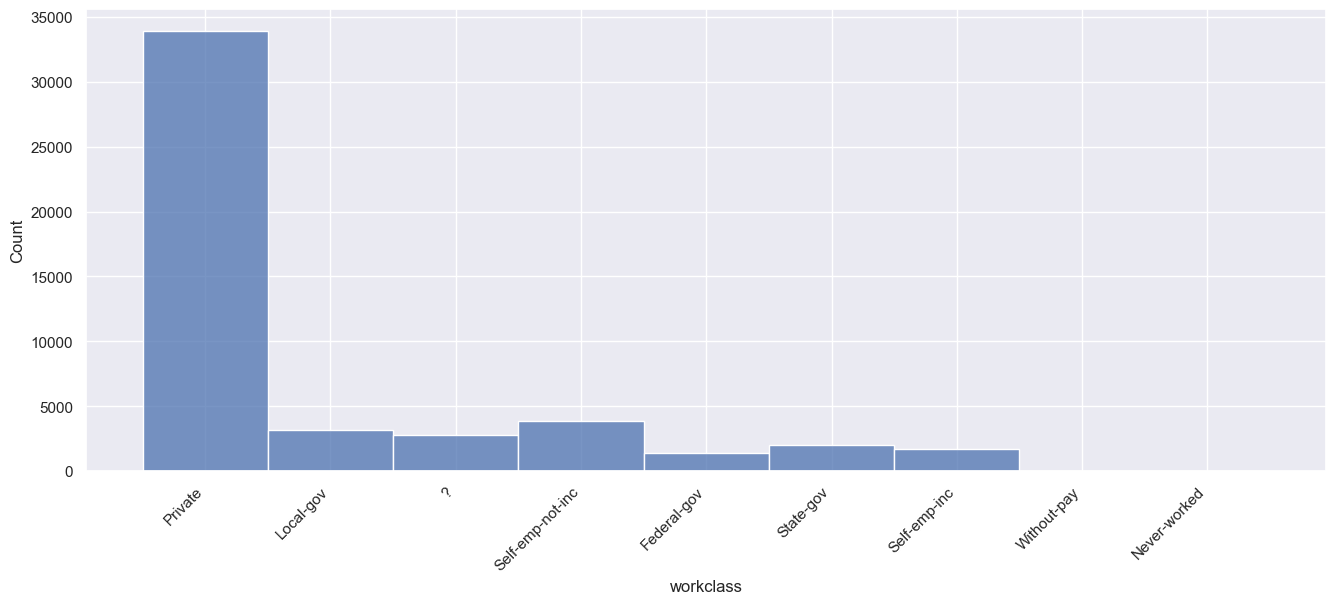

In [21]:
sns.histplot(data=data.workclass)
plt.xticks(rotation=45, ha='right')
plt.show()

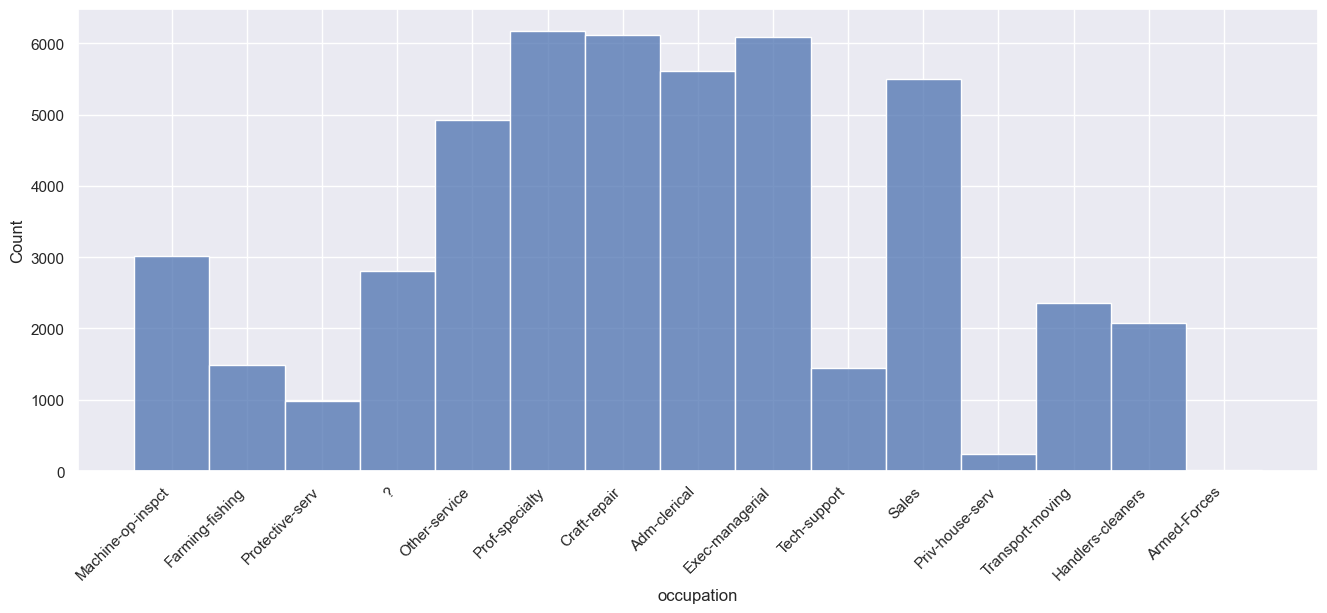

In [22]:
sns.histplot(data=data.occupation)
plt.xticks(rotation=45, ha='right')
plt.show()

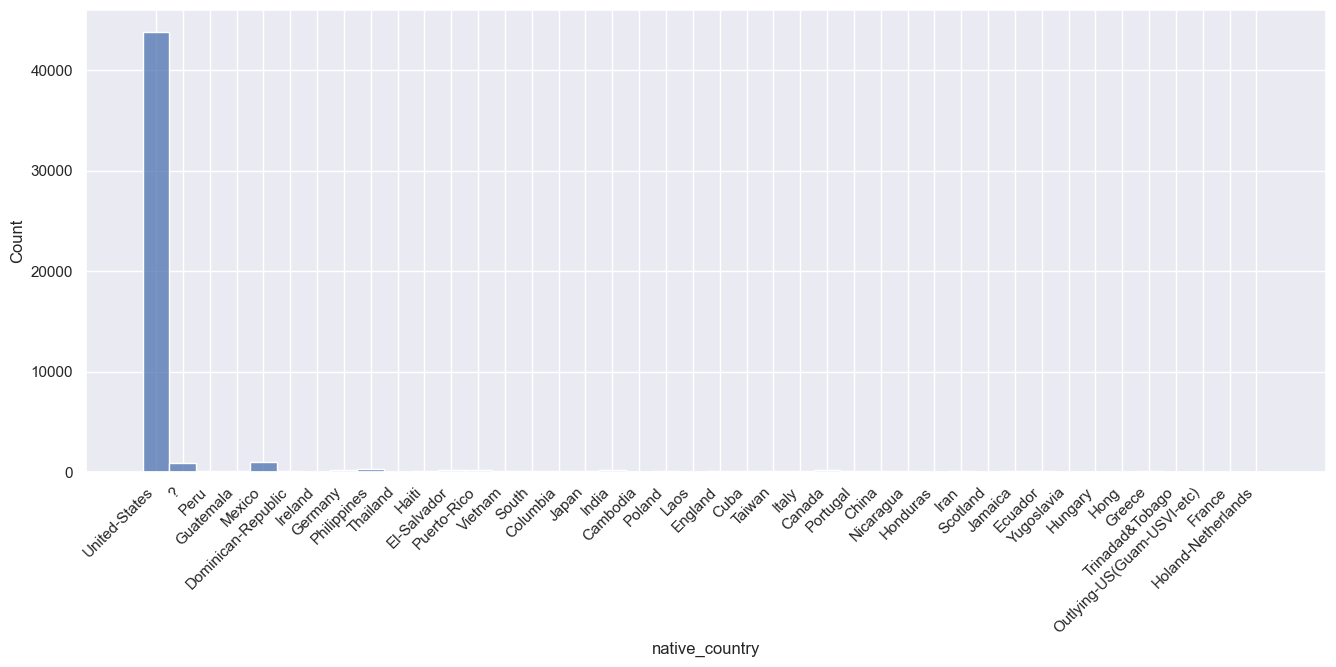

In [23]:
sns.histplot(data=data.native_country)
plt.xticks(rotation=45, ha='right')
plt.show()

**Conclusion:** Visually, value '?' brings rather significant impact for above attributes. It makes sense to compare modelling results with and without value '?' 

In [24]:
data_all = data

In [25]:
for i in ['workclass','occupation','native_country']: #all rows with unknown values are excluded
    data = data[~(data[i]=='?')]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational_num  45222 non-null  int64 
 5   marital_status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital_gain     45222 non-null  int64 
 11  capital_loss     45222 non-null  int64 
 12  hours_per_week   45222 non-null  int64 
 13  native_country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [27]:
data = data.reset_index(drop=True)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
nominal_attributes = ['workclass', 'education','marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country']

In [30]:
selected_columns = data[['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income']]
selected_columns_alldata = data_all[['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income']]

In [31]:
X = pd.get_dummies(selected_columns, columns=nominal_attributes, drop_first=True, dtype = int)
X_alldata = pd.get_dummies(selected_columns_alldata, columns=nominal_attributes, drop_first=True, dtype = int)

In [32]:
del X['income']
del X_alldata['income']

In [33]:
X.head()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,25,226802,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,198693,6,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
X_alldata.head()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_alldata = LabelEncoder()

In [36]:
le.fit(data['income'])

LabelEncoder()

In [37]:
le_alldata.fit(data_all['income'])

LabelEncoder()

In [38]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [39]:
le_alldata.classes_

array(['<=50K', '>50K'], dtype=object)

In [40]:
y = pd.Series(data=le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [41]:
y_alldata = pd.Series(data=le_alldata.transform(data_all['income']))
y_alldata.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [42]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
X_test.index

Index([38210, 34457,   274, 17637, 30247,  1967, 25089, 17250, 23029, 11746,
       ...
       18674, 19984, 24717,  8533, 38164, 28455, 31680,  8044,  7671, 12781],
      dtype='int64', length=9045)

In [44]:
X_train_alldata, X_test_alldata, y_train_alldata, y_test_alldata = train_test_split(X_alldata, y_alldata, test_size=0.2, random_state=30)
X_test_alldata.index

Index([46677, 36487, 27085, 45936, 37592,  3703,  5113, 17488,  4230, 40032,
       ...
        8438, 33889,  9904, 17008, 38360, 20139,  8449, 12438,  3956, 29407],
      dtype='int64', length=9769)

In [45]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [46]:
predictions[:5]

array([0, 0, 1, 0, 0])

In [47]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
model.predict_proba(X_test)

array([[0.86293396, 0.13706604],
       [0.95166826, 0.04833174],
       [0.00843468, 0.99156532],
       ...,
       [0.99496238, 0.00503762],
       [0.77625729, 0.22374271],
       [0.97463259, 0.02536741]])

In [49]:
model.score(X_train, y_train)

0.8494623655913979

In [50]:
model.score(X_test, y_test)

0.8516307352128247

Let's check the modelling results for all data

In [51]:
model.fit(X_train_alldata, y_train_alldata)
predictions_alldata = model.predict(X_test_alldata)
predictions_alldata[:5]

array([0, 0, 0, 1, 0])

In [52]:
model.predict(X_test_alldata)

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
model.predict_proba(X_test_alldata)

array([[9.26803013e-01, 7.31969868e-02],
       [7.41018627e-01, 2.58981373e-01],
       [9.95686888e-01, 4.31311183e-03],
       ...,
       [5.49612771e-01, 4.50387229e-01],
       [9.99887168e-01, 1.12831992e-04],
       [9.17131477e-01, 8.28685233e-02]])

In [54]:
model.score(X_train_alldata, y_train_alldata)

0.8545287026847184

In [55]:
model.score(X_test_alldata, y_test_alldata)

0.8454294195925888

# Метод опорных векторов. SVM

In [56]:
from sklearn.svm import SVC

In [57]:
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(kernel='poly'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly'))])

In [58]:
clf.score(X_train, y_train)

0.8468640296320867

In [59]:
clf.score(X_test, y_test)

0.8297401879491432

Let's check modelling results for all data via SVM method

In [60]:
# используем пайплайны
clf_alldata = make_pipeline(StandardScaler(), SVC(kernel='poly'))
clf_alldata.fit(X_train_alldata, y_train_alldata)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly'))])

In [61]:
clf_alldata.score(X_train_alldata, y_train_alldata)

0.8547078545287027

In [62]:
clf_alldata.score(X_test_alldata, y_test_alldata)

0.8294605384379159

## **Conclusions:**
1. Overall, both methods (logistics regression and SVM) deliver good accuracy with income classification prediction (>0.8).
2. No significant difference is noticed for both logistics regression and SVM methods.
3. No significant difference is noticed for both sets of data (without unknown values and with unknown values).

In [65]:
pwd

'C:\\Users\\grebe\\Documents\\EDUCATION\\Машинное обучение фундаментальные инструменты и практики\\Работа с признаками и построение моделей\\Логистическая регрессия'